# Analyse Experiment Data

In [1]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

In [44]:
config = {}

config['pathToData'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/femto/munki1_241_242_243_css.wfdisc"

In [45]:
# os.path.listdir(config['pathToData'])

In [46]:
st = obs.read(config['pathToData'], format="CSS")
st.merge()
st[0].stats.calib = 1.0

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/core/trace.py:220: UserWarning: Calibration factor set to 0.0!
  warnings.warn(msg, UserWarning)


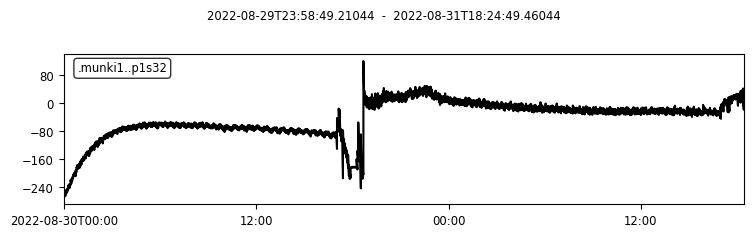

In [47]:
st.plot(equal_scale=False);

## Experiment 1

In [32]:
time_delta1 = 2*60
times1 = {
         0: obs.UTCDateTime("2022-08-30 18:53:00"),
         1: obs.UTCDateTime("2022-08-30 18:56:00"),
         2: obs.UTCDateTime("2022-08-30 19:00:00"),
         3: obs.UTCDateTime("2022-08-30 19:03:00"),
         4: obs.UTCDateTime("2022-08-30 19:06:00"),
         5: obs.UTCDateTime("2022-08-30 19:10:00"),
         6: obs.UTCDateTime("2022-08-30 19:14:00"),
         7: obs.UTCDateTime("2022-08-30 19:18:00"),
         8: obs.UTCDateTime("2022-08-30 19:22:00"),
         9: obs.UTCDateTime("2022-08-30 19:26:00"),
}

In [33]:
def __makeplot(st, times, time_delta, offset=0):

    df = st[0].stats.sampling_rate    
    
    data_cuts = []
    for n, time in enumerate(times):
        print(n, times[time]-offset, times[time]+time_delta-offset)
        st1 = st.copy()
        data_cuts.append(st1.trim(times[time]-offset, times[time]+time_delta-offset)[0].data)

        
    font = 12
    
    fig, ax = plt.subplots(2,1, figsize=(15,5))

    NN = len(data_cuts[0])

    tx = np.linspace(0, NN/df, NN)

    data_master = np.zeros(NN)
    mins, maxs = [],[]
    for n, data in enumerate(data_cuts):
        ax[0].plot(tx,data, label=n)
        mins.append(min(data)), maxs.append(max(data))
        data_master += data 
        
    ## normalize
    data_master /= len(data_cuts)

    ax[1].plot(tx, data_master)

    ax[0].vlines(offset, min(mins), max(maxs), color="k")
    ax[1].vlines(offset, min(data_master), max(data_master), color="k")

    ax[0].legend(loc="lower right")
    
    ax[0].set_ylabel("Amplitude (rad)", fontsize=font)    
    ax[1].set_ylabel("Amplitude (rad)", fontsize=font)    
    ax[1].set_xlabel("Time (s)", fontsize=font)

0 2022-08-30T18:52:40.000000Z 2022-08-30T18:54:40.000000Z
1 2022-08-30T18:55:40.000000Z 2022-08-30T18:57:40.000000Z
2 2022-08-30T18:59:40.000000Z 2022-08-30T19:01:40.000000Z
3 2022-08-30T19:02:40.000000Z 2022-08-30T19:04:40.000000Z
4 2022-08-30T19:05:40.000000Z 2022-08-30T19:07:40.000000Z
5 2022-08-30T19:09:40.000000Z 2022-08-30T19:11:40.000000Z
6 2022-08-30T19:13:40.000000Z 2022-08-30T19:15:40.000000Z
7 2022-08-30T19:17:40.000000Z 2022-08-30T19:19:40.000000Z
8 2022-08-30T19:21:40.000000Z 2022-08-30T19:23:40.000000Z
9 2022-08-30T19:25:40.000000Z 2022-08-30T19:27:40.000000Z


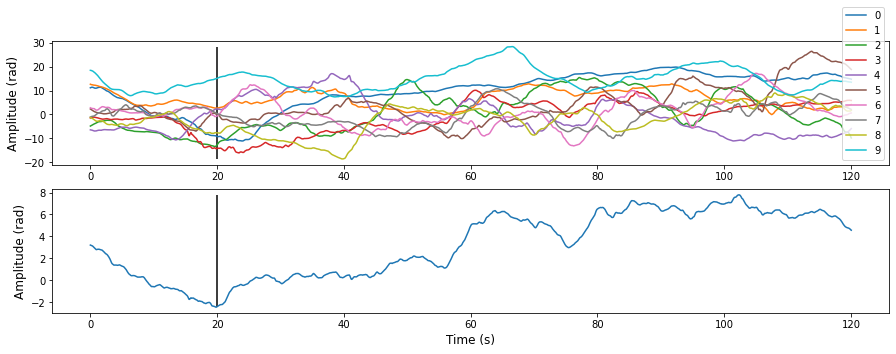

In [34]:
__makeplot(st, times1, time_delta1, offset=20)

## Experiment 2

In [35]:
time_delta2 = 1*60
times2 = {
         0: obs.UTCDateTime("2022-08-30 19:29:00"),
         1: obs.UTCDateTime("2022-08-30 19:32:00"),
         2: obs.UTCDateTime("2022-08-30 19:35:00"),
         3: obs.UTCDateTime("2022-08-30 19:38:00"),
         4: obs.UTCDateTime("2022-08-30 19:43:00"),
        }

0 2022-08-30T19:28:40.000000Z 2022-08-30T19:29:40.000000Z
1 2022-08-30T19:31:40.000000Z 2022-08-30T19:32:40.000000Z
2 2022-08-30T19:34:40.000000Z 2022-08-30T19:35:40.000000Z
3 2022-08-30T19:37:40.000000Z 2022-08-30T19:38:40.000000Z
4 2022-08-30T19:42:40.000000Z 2022-08-30T19:43:40.000000Z


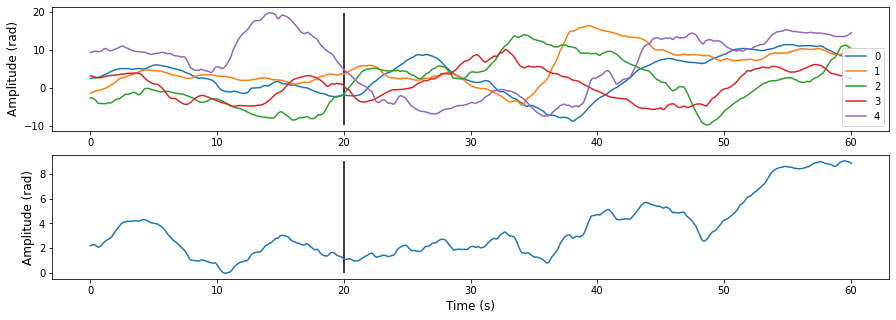

In [36]:
__makeplot(st, times2, time_delta2, offset=20)

## Experiment 3

In [37]:
time_delta3 = 2*60
times3 = {
         0: obs.UTCDateTime("2022-08-30 19:46:00"),
         1: obs.UTCDateTime("2022-08-30 19:48:00"),
}

0 2022-08-30T19:45:40.000000Z 2022-08-30T19:47:40.000000Z
1 2022-08-30T19:47:40.000000Z 2022-08-30T19:49:40.000000Z


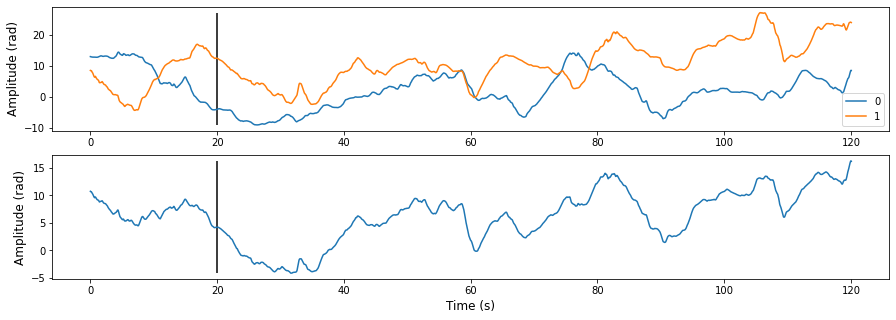

In [38]:
__makeplot(st, times3, time_delta3, offset=20)

## Experiment 5

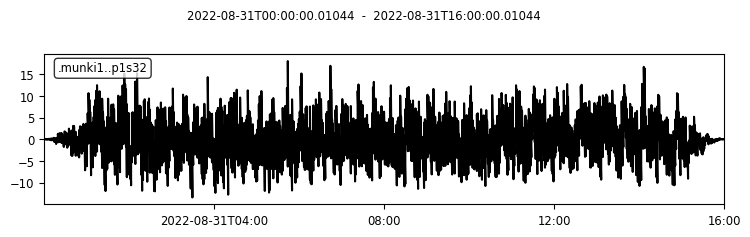

In [39]:
st2 = st.copy()

st2.trim(obs.UTCDateTime("2022-08-31 00:00"), obs.UTCDateTime("2022-08-31 16:00"))

st2.detrend('polynomial', order=2)
# st2.detrend('simple')

st2.taper(0.1)
# st2.filter('highpass', freq=0.1, corners=4, zerophase=True)

st2.plot();

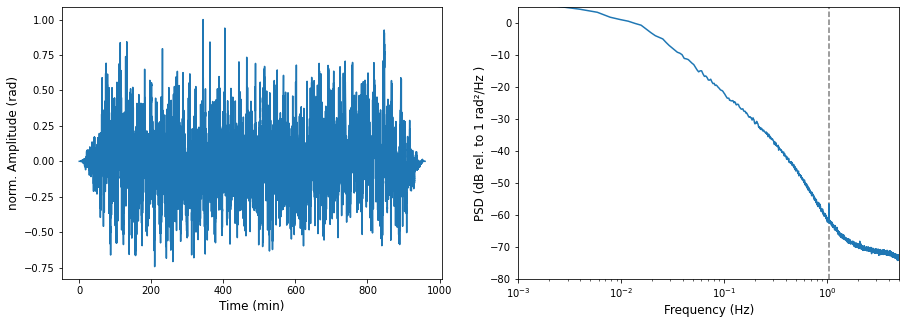

In [40]:
from scipy.signal import welch, hann


signal = st2[0].data / max(st2[0].data)

nblock =  1028*10
overlap = None
# window = hann(int(nblock))

f, Pxx = welch(signal, fs=st2[0].stats.sampling_rate, 
                window='hann', noverlap=overlap, nperseg=nblock,
                scaling="density",
                return_onesided=True)
## normalize
# Pxx /= nblock

Pxx = 10*np.log10(Pxx)


## ------------------------

font = 12

fig, ax = plt.subplots(1,2,figsize=(15,5))

tx = np.linspace(0, st2[0].stats.npts/st2[0].stats.sampling_rate/60, st2[0].stats.npts)
ax[0].plot(tx, signal)

ax[1].vlines(1.04, min(Pxx), max(Pxx), color="grey", ls="--", alpha=1, zorder=0)
ax[1].semilogx(f, Pxx)

ax[1].set_ylim(-80,5)
ax[1].set_xlim(1e-3,5)

ax[0].set_xlabel("Time (min)", fontsize=font)
ax[1].set_xlabel("Frequency (Hz)", fontsize=font)
ax[0].set_ylabel("norm. Amplitude (rad)", fontsize=font)
ax[1].set_ylabel("PSD (dB rel. to 1 rad²/Hz )", fontsize=font)

plt.show();

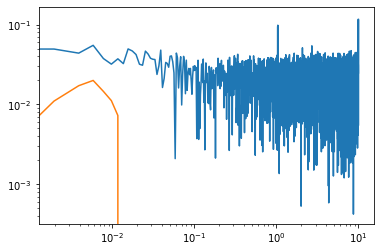

In [41]:
def __rms_power(Pxx, f):
   
    rxx = [np.sqrt(abs(Pxx[n+1]-Pxx[n]) * abs(f[n+1]-f[n])) for n in range(len(Pxx)-1)]
    
    return rxx, f[:-1]

rxx, ff = __rms_power(Pxx, f)

plt.loglog(ff, rxx)
plt.loglog(f, Pxx * f)

## CrossCorrelate

In [42]:
from andbro__crosscorrelation import __crosscorrelation

In [43]:
st4 = st.copy()
st4.split().detrend("linear")
st4.merge(fill_value='interpolate')


1 Trace(s) in Stream:
.munki1..p1s32 | 2022-08-29T23:58:49.210440Z - 2022-08-31T18:24:49.460440Z | 20.0 Hz, 3055206 samples (masked)

In [18]:
times, time_delta = times1, time_delta1
offset = 20

data_cuts = []
for n, time in enumerate(times):
    print(n, times[time]-offset, times[time]+time_delta-offset)
    st1 = st.copy()
    dat = np.array(st1.trim(times[time]-offset, times[time]+time_delta-offset)[0].data)
    data_cuts.append(dat/max(dat))


0 2022-08-30T18:52:40.000000Z 2022-08-30T18:54:40.000000Z


NameError: name 'st' is not defined

In [19]:
out = __crosscorrelation(data_cuts[0], data_cuts[1], deltaT=st[0].stats.delta)

IndexError: list index out of range

In [20]:
from pandas import DataFrame

df = DataFrame()
for n, trace in enumerate(data_cuts):
    df[n] = trace
    
df.corr()

""


/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  """Entry point for launching an IPython kernel.
/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  """Entry point for launching an IPython kernel.


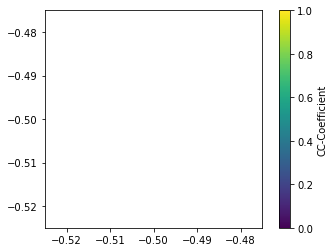

In [21]:
cbar=plt.imshow(df.corr())

cax = plt.colorbar(cbar)

cax.set_label("CC-Coefficient")

##  Test PSD

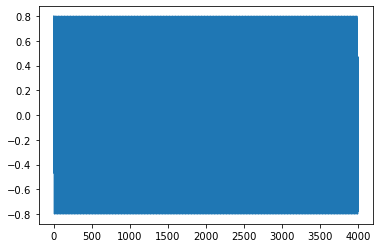

In [22]:
aa = [1,.5,6,.5,4]
ff = [0.1, 1, 4,8,2]
phi = [0.2, 0.7, 1.1, 3.0, 2]

aa = [.3,.6]
ff = [1,5]
phi = [1,2]


dt = 1/20
tt = np.arange(0,200,dt)

sig = np.zeros(len(tt))
for a,f,p in zip(aa, ff, phi):
    sig += a * np.sin(2*np.pi*f*tt+p)

plt.plot(sig)

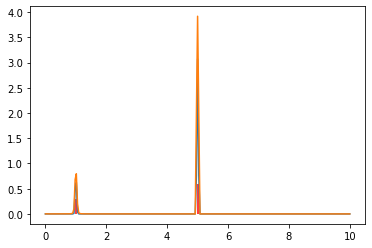

In [23]:
nblock =  512
overlap = None
win = hann(nblock, True)

f, Pxx = welch(sig, fs=1/dt, 
                window='hann', noverlap=overlap, nperseg=nblock,
                scaling="density",
                return_onesided=True)


plt.plot(f, Pxx)
plt.plot(f, np.sqrt(Pxx*f))

# plt.vlines(ff, 0, max(Pxx), color="grey", zorder=-1)
plt.vlines(ff, 0, aa, color="red", zorder=-1)

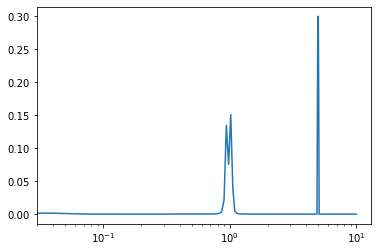

In [24]:
N = len(Pxx)-1

new = np.zeros(N)
for n in range(N):
    new[n] = np.sqrt(abs(Pxx[n+1]-Pxx[n]) * abs(f[n+1]-f[n]))
    
plt.semilogx(f[:-1], new)